# Improve intensidad en fase

Luis Miguel Sánchez Brea
2022/09/25

**Descripción**:
Para la fase metí un parámetro que dibujara solo aquello que tenía un % > CONF_DRAWING['percentage_intensity'] = 0.005
, pero es mejor tenerlo a mano.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import um, np, degrees,mm
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300  #dpi


## XY

In [3]:
x = np.linspace(-250 * um, 250 * um, 1024)
y = np.linspace(-250 * um, 250 * um, 1024)
wavelength = 0.6238 * um
period = 50 * um
fill_factor=0.5
angle=0*degrees

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(r0=(0,0), radius=100*um, angle=0)

t1 = Scalar_source_XY(x,y,wavelength)
t1.gauss_beam(r0=(0,0), w0=10*um, z0=0)

In [4]:
t2=t1.RS(z=4*mm)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f24b12733a0>)

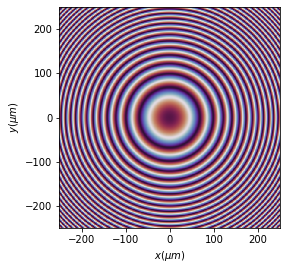

In [5]:
t2.draw('phase', percentage_intensity=0)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f24aefadde0>)

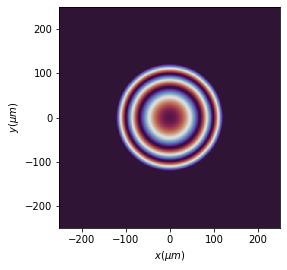

In [6]:
t2.draw('phase', percentage_intensity=0.01)

((<matplotlib.image.AxesImage at 0x7f24aefce440>,
  <matplotlib.image.AxesImage at 0x7f24ad6a1c30>),
 None,
 None)

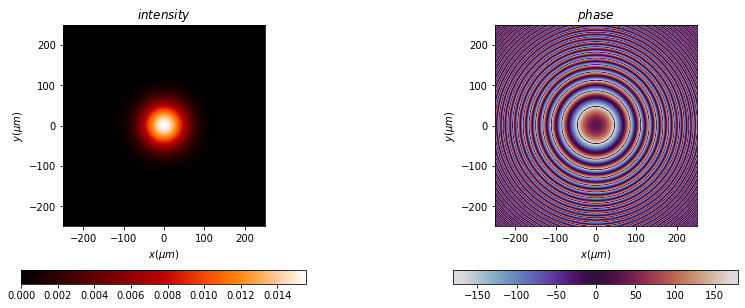

In [7]:
t2.draw('field', percentage_intensity=0)

((<matplotlib.image.AxesImage at 0x7f24ad716bf0>,
  <matplotlib.image.AxesImage at 0x7f24ad623ca0>),
 None,
 None)

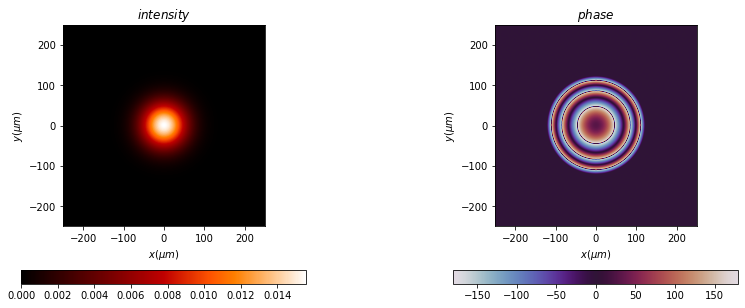

In [8]:
t2.draw('field', percentage_intensity=0.01)

XZ

In [9]:
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X


In [10]:
length = 50 * um
wavelength = .5 * um
x0 = np.linspace(-length / 2, length / 2, 512)
z0 = np.linspace(0 * um, 500 * um, 256)

x_ini = -250 * um * np.tan(30 * degrees)
print("x_ini={}".format(x_ini))
# source
f1 = Scalar_source_X(x0, wavelength)
f1.gauss_beam(A=1, x0=0, z0=250 * um, w0=2 * um, theta=0 * degrees)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.clear_refraction_index()
u1.incident_field(f1)
u1.WPM(verbose=False)

x_ini=-144.33756729740642


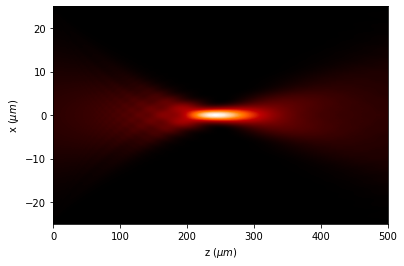

In [11]:
u1.draw('intensity')

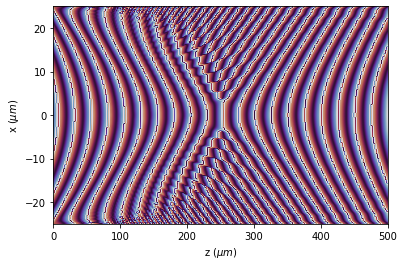

In [12]:
u1.draw('phase', percentage_intensity=0)

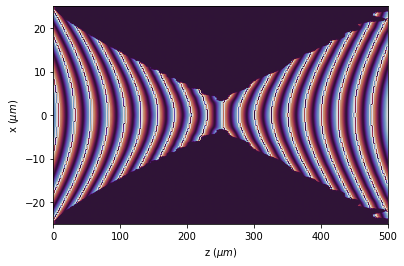

In [13]:
u1.draw('phase')

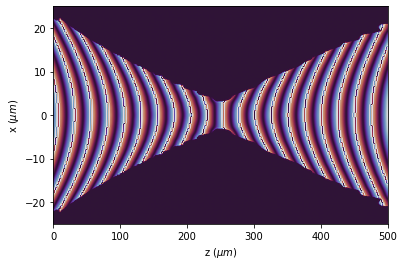

In [14]:
u1.draw('phase', percentage_intensity=0.01)